In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [23]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [25]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
dummy_Geography = pd.get_dummies(df.Geography, drop_first=True)
dummy_Gender = pd.get_dummies(df.Gender, drop_first=True)

In [27]:
df = pd.concat([df,dummy_Geography,dummy_Gender],axis=1)

In [28]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [29]:
customer_df = df.copy()
customer_df.drop(['CustomerId','Surname','Geography','Gender'],axis=1, inplace=True)
customer_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [30]:
cols = customer_df.columns.tolist()

In [31]:
cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Germany',
 'Spain',
 'Male']

In [33]:
new_df = customer_df
new_df = new_df[['Exited','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
 'EstimatedSalary','Germany','Spain', 'Male']]

In [34]:
new_df

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
RowNumber,,,,,,,,,,,,
1,1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,0,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,1,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,0,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,0,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,771,39,5,0.00,2,1,0,96270.64,0,0,1
9997,0,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9998,1,709,36,7,0.00,1,0,1,42085.58,0,0,0


In [35]:
new_df.to_csv('Customer_Churn_Cleaned_Data')

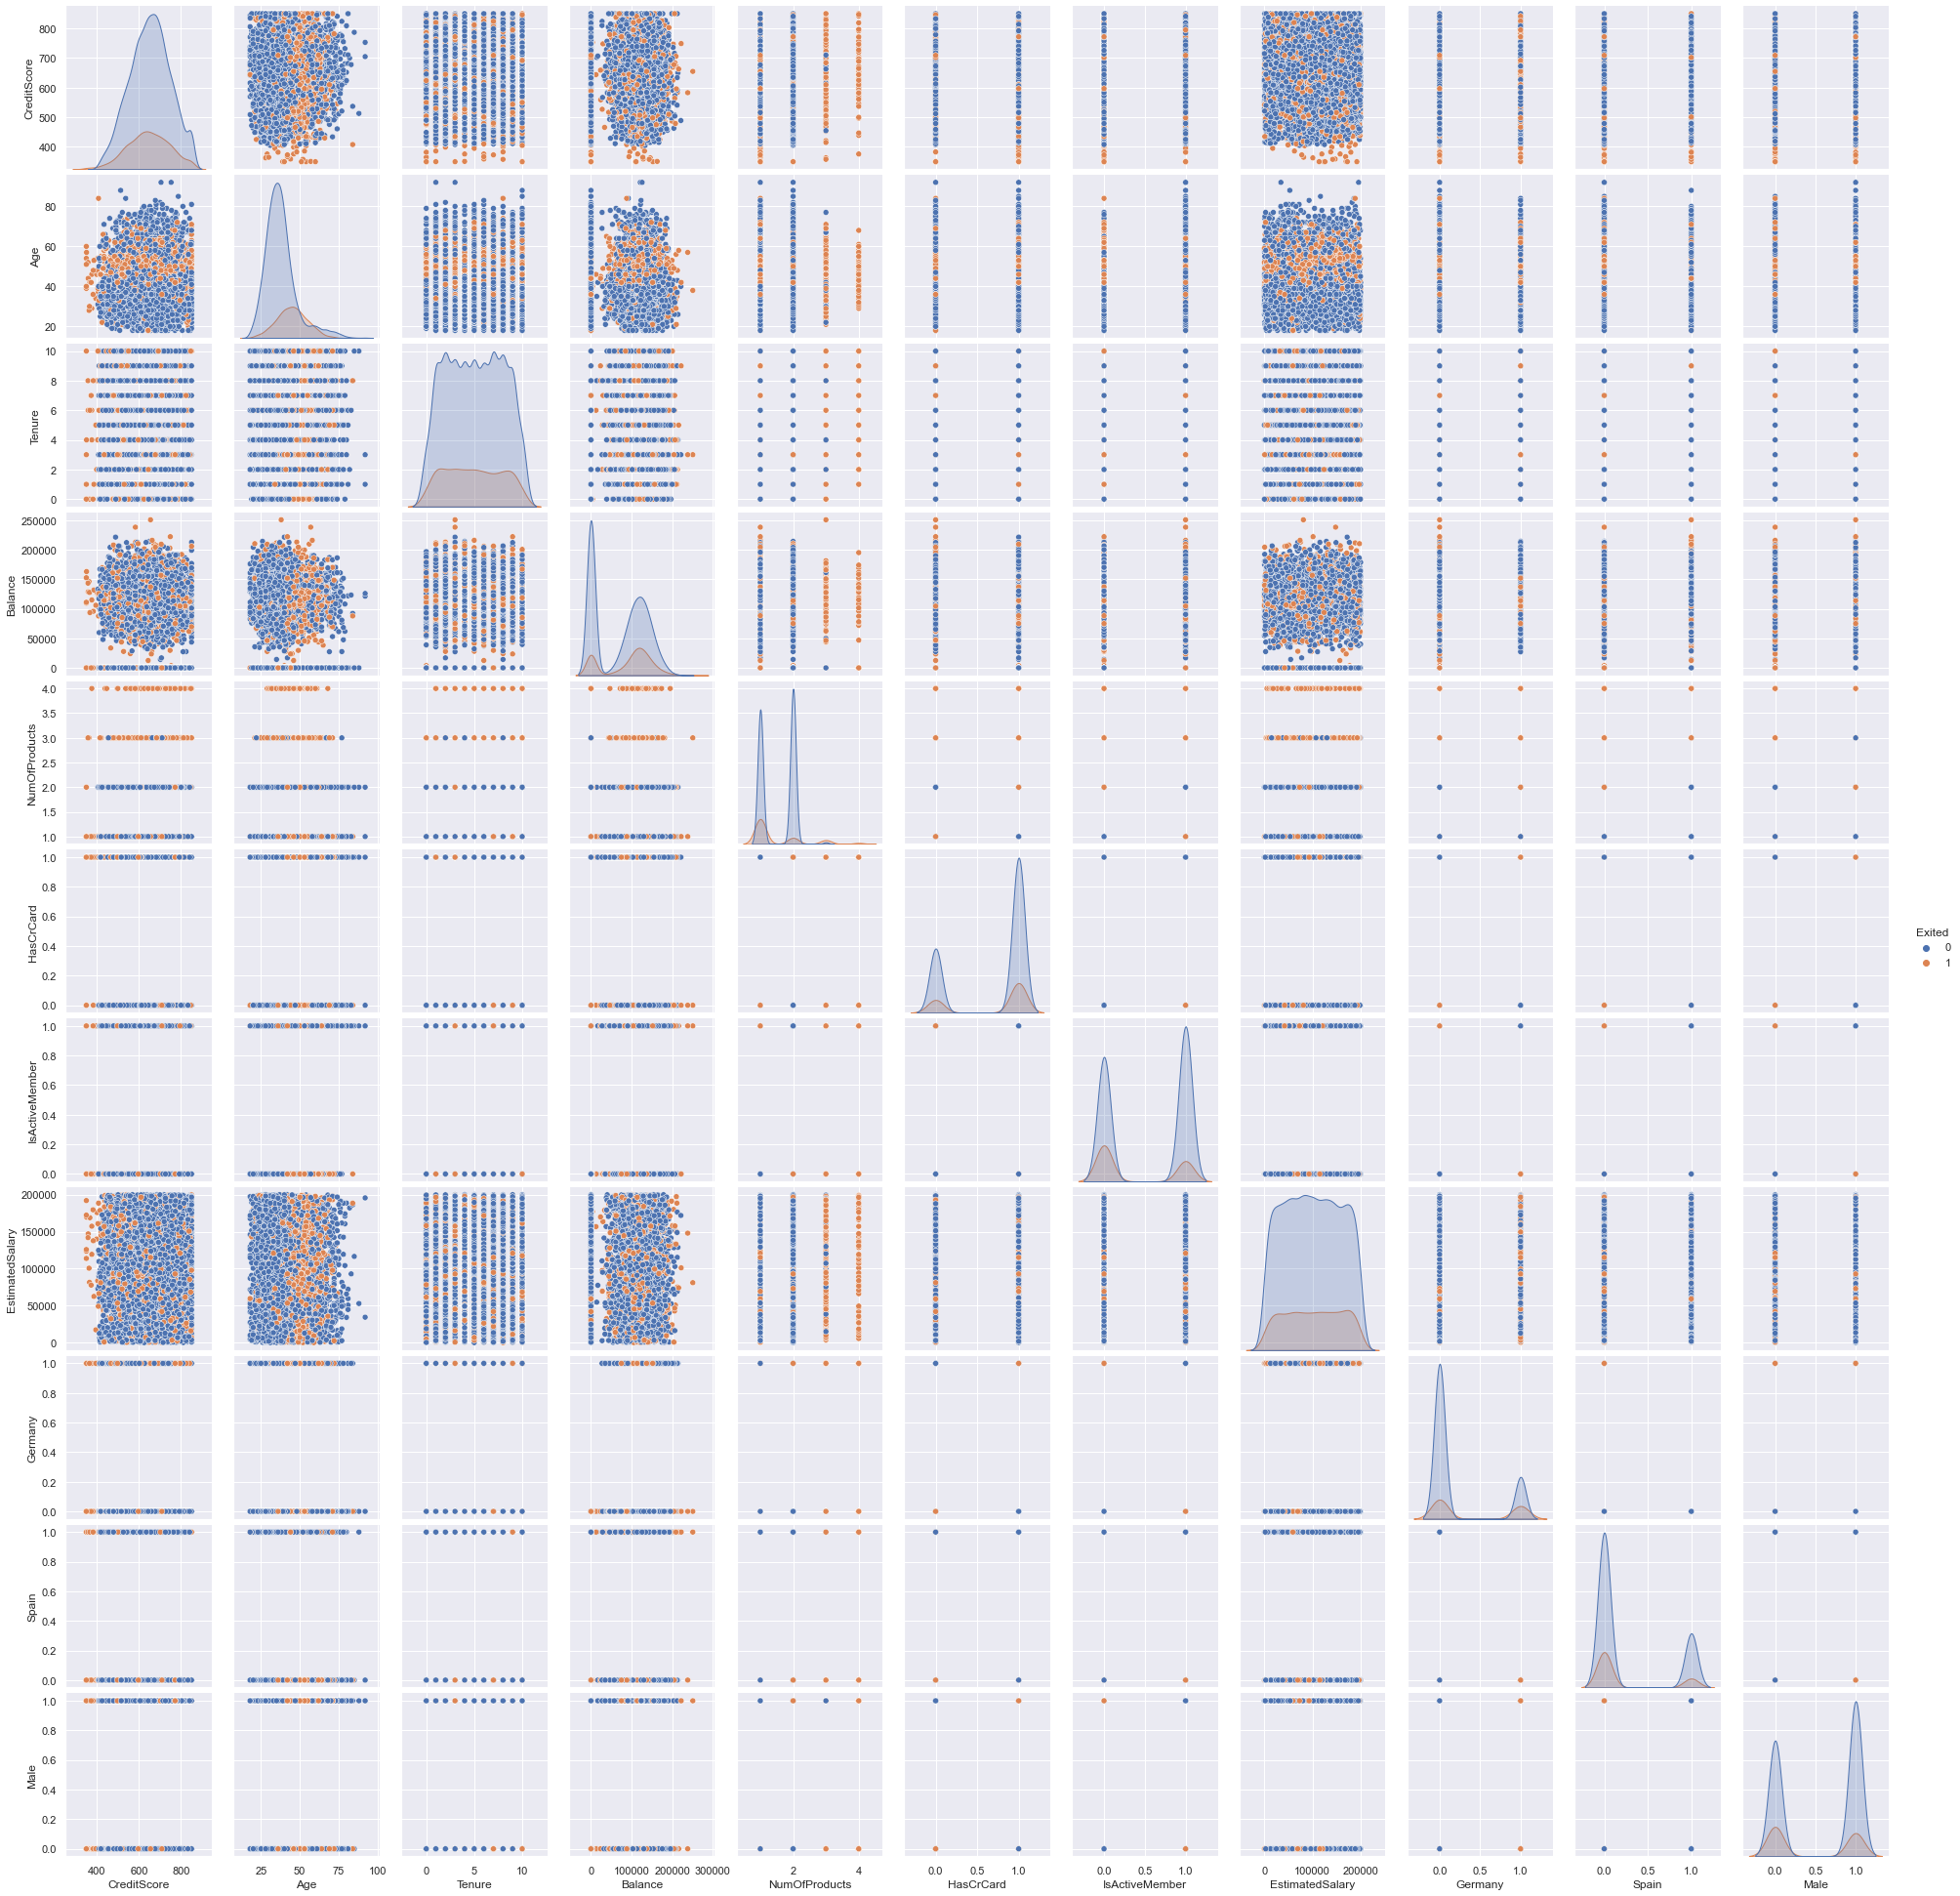

In [74]:
sns.pairplot(new_df, hue = 'Exited')

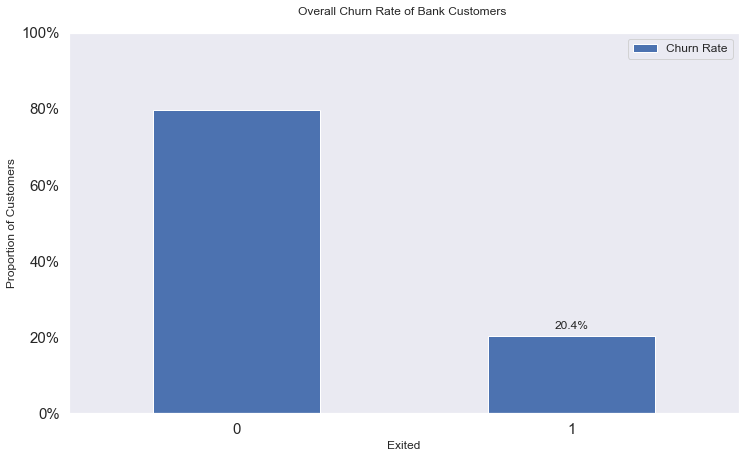

In [37]:
import matplotlib.ticker as mtick
churn_rate = df[["Exited", "CustomerId"]]

sectors = churn_rate.groupby("Exited")
churn_rate = pd.DataFrame(sectors["CustomerId"].count())

churn_rate ["Churn Rate"] = (churn_rate ["CustomerId"]/ sum(churn_rate["CustomerId"]))*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,
                                          subplots = False, figsize =(12, 7), fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers')
plt.xlabel('Exited')
plt.title('Overall Churn Rate of Bank Customers \n')

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
    ax.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
    
add_value_labels(ax)


In [38]:
# pd.Series(map(lambda x: dict(Yes=1, No=0)[x], df.Churn.values.tolist()), df.index)

In [39]:
X = new_df.loc[:,'CreditScore':'Male']
y = new_df['Exited']

In [40]:
np.mean(y)
# probability_churn

0.2037

# Split data and train models

In [41]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

In [42]:
np.mean(y_train)

0.200125

In [43]:
columns_list = list(X_train.columns)
columns_list

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain',
 'Male']

In [60]:
for index,item in enumerate(columns_list):
    print(item)
    min = X_train[item].min()
    max = X_train[item].max()
    count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),item], bins=25, range=(min,max))
    count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),item], bins=25, range=(min,max))


CreditScore
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Germany
Spain
Male


Credit Score description 
 count    8000.000000
mean      650.445250
std        96.746119
min       350.000000
25%       583.000000
50%       651.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64


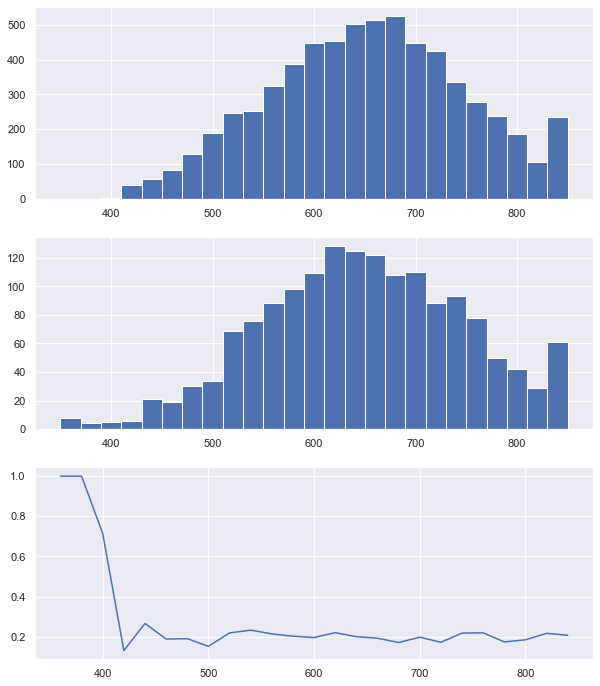

In [61]:
print('Credit Score description \n',X_train.CreditScore.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'CreditScore'], bins=25, range=(350,850))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'CreditScore'], bins=25, range=(350,850))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

AGE: 
 count    8000.000000
mean       38.856625
std        10.451087
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64


<ipython-input-62-6ac74d78e00f>:7: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


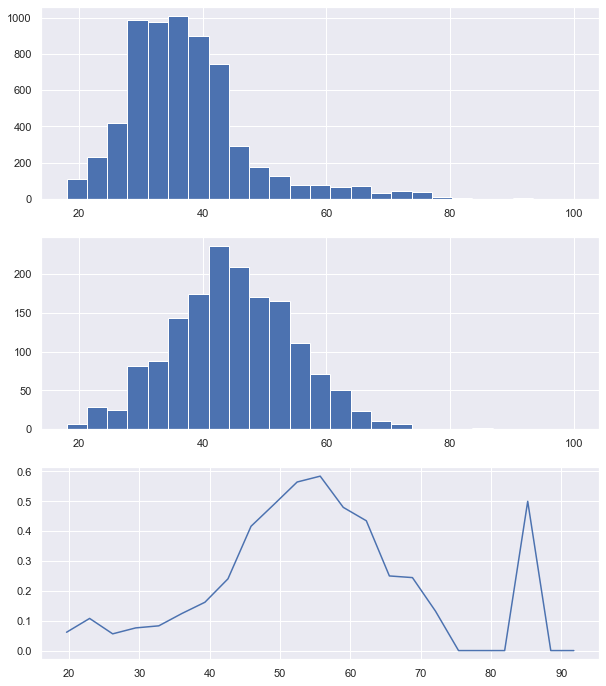

In [62]:
print('AGE: \n',X_train.Age.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Age'], bins=25, range=(18,100))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Age'], bins=25, range=(18,100))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

Tenure: 
 count    8000.000000
mean        5.016750
std         2.889293
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64


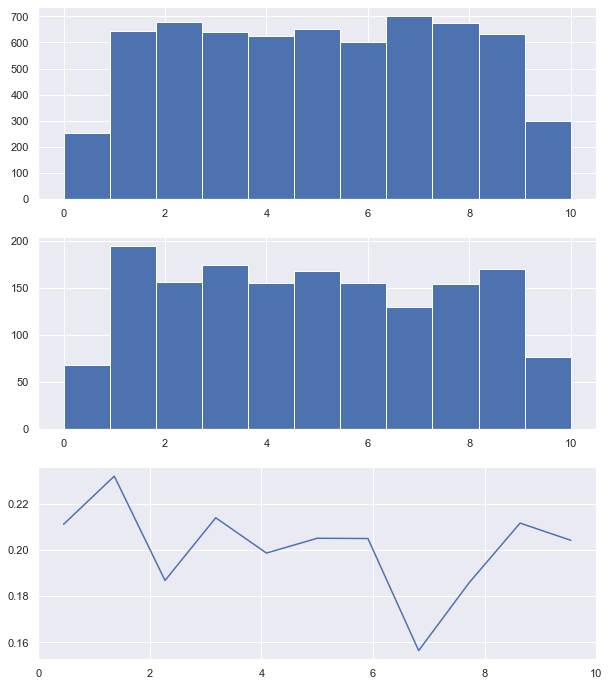

In [63]:
print('Tenure: \n',X_train.Tenure.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Tenure'], bins=11, range=(0,10))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Tenure'], bins=11, range=(0,10))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [64]:
['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain',
 'Male']

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain',
 'Male']

Balance: 
 count      8000.000000
mean      76167.046245
std       62381.550565
min           0.000000
25%           0.000000
50%       96932.590000
75%      127633.302500
max      250898.090000
Name: Balance, dtype: float64


<ipython-input-65-3838eaf06133>:7: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


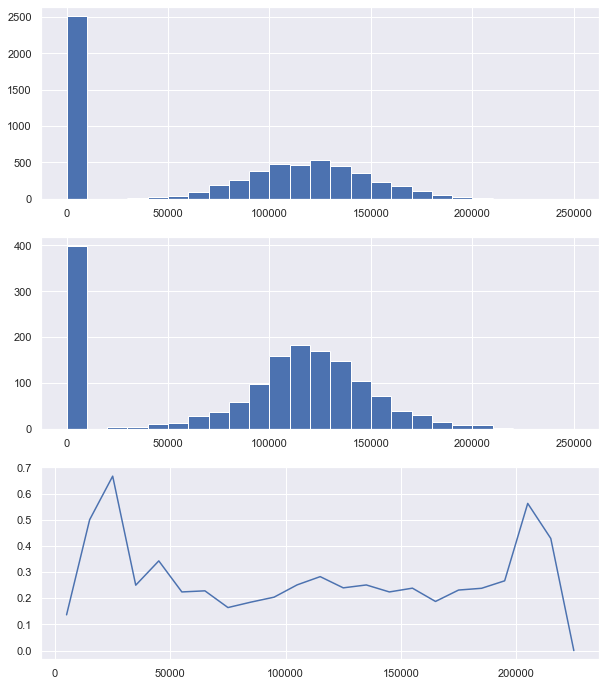

In [65]:
print('Balance: \n',X_train.Balance.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Balance'], bins=25, range=(0,250000))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Balance'], bins=25, range=(0,250000))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

Number Of Products: 
 count    8000.000000
mean        1.531750
std         0.583553
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: NumOfProducts, dtype: float64


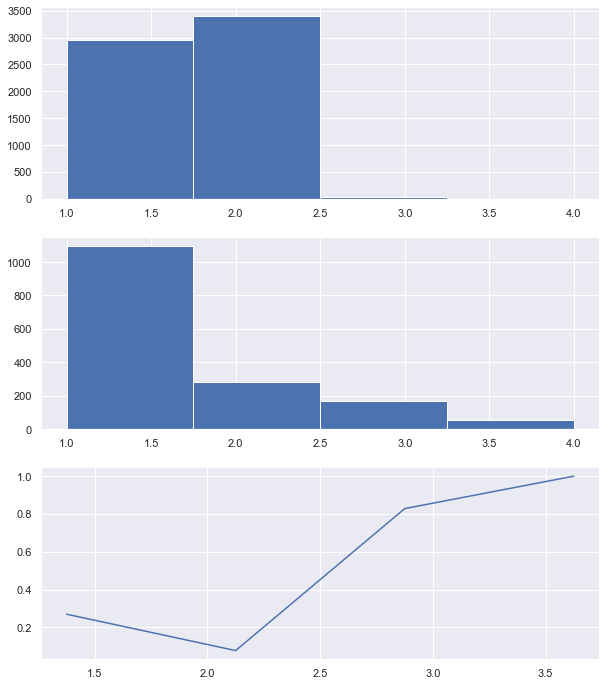

In [66]:
print('Number Of Products: \n',X_train.NumOfProducts.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'NumOfProducts'], bins=4, range=(1,4))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'NumOfProducts'], bins=4, range=(1,4))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

Has Credit Card: 
 count    8000.000000
mean        0.706875
std         0.455224
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasCrCard, dtype: float64


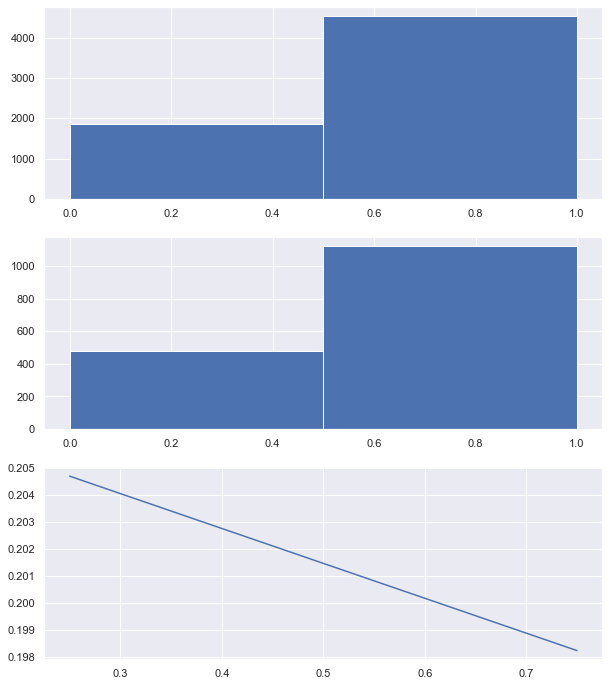

In [67]:
print('Has Credit Card: \n',X_train.HasCrCard.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'HasCrCard'], bins=2, range=(0,1))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'HasCrCard'], bins=2, range=(0,1))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

IsActiveMember: 
 count    8000.000000
mean        0.514875
std         0.499810
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IsActiveMember, dtype: float64


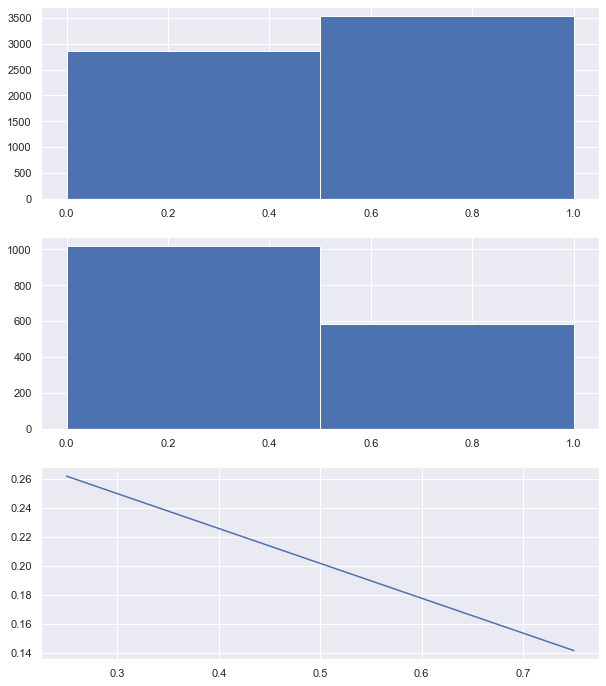

In [68]:
print('IsActiveMember: \n',X_train.IsActiveMember.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'IsActiveMember'], bins=2, range=(0,1))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'IsActiveMember'], bins=2, range=(0,1))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

EstimatedSalary: 
 count      8000.00000
mean     100619.92200
std       57487.77078
min          11.58000
25%       51536.98250
50%      101019.01500
75%      149686.53000
max      199992.48000
Name: EstimatedSalary, dtype: float64


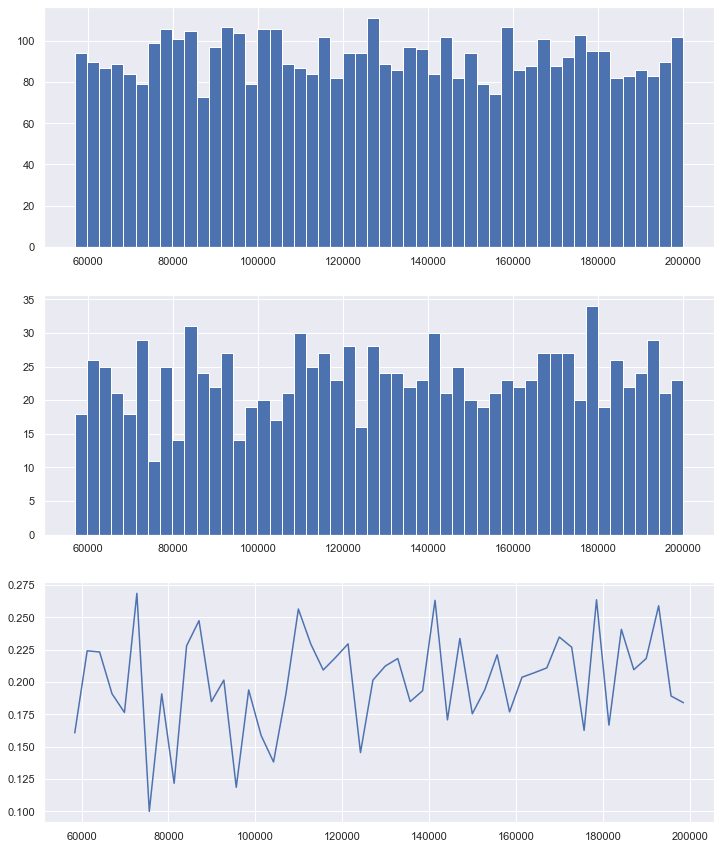

In [69]:
print('EstimatedSalary: \n',X_train.EstimatedSalary.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(12, 15))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'EstimatedSalary'], bins=50, range=(57000,200000))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'EstimatedSalary'], bins=50, range=(57000,200000))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

Germany: 
 count    8000.000000
mean        0.252750
std         0.434616
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Germany, dtype: float64


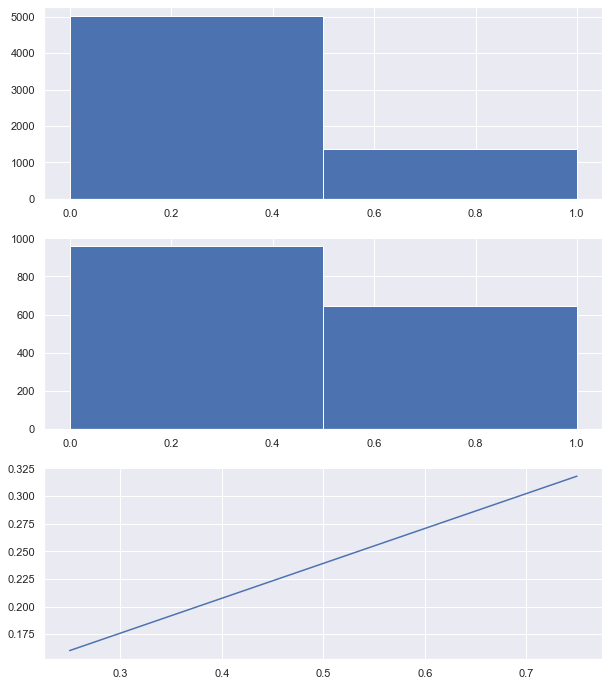

In [70]:
print('Germany: \n',X_train.Germany.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Germany'], bins=2, range=(0,1))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Germany'], bins=2, range=(0,1))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

Spain: 
 count    8000.000000
mean        0.247125
std         0.431367
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Spain, dtype: float64


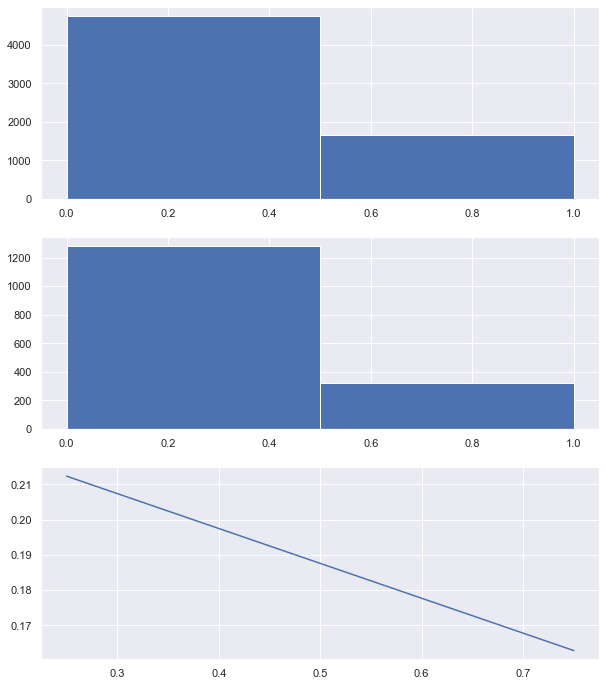

In [71]:
print('Spain: \n',X_train.Spain.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Spain'], bins=2, range=(0,1))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Spain'], bins=2, range=(0,1))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

Male: 
 count    8000.000000
mean        0.548625
std         0.497661
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Male, dtype: float64


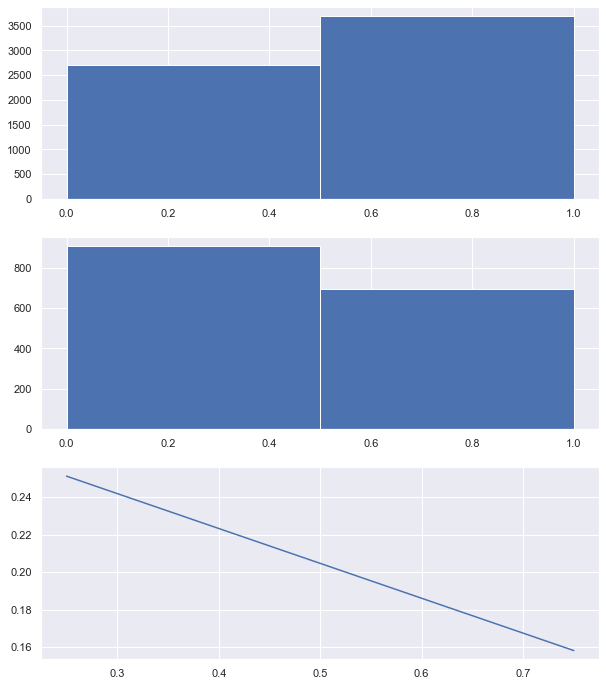

In [72]:
print('Male: \n',X_train.Male.describe())
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Male'], bins=2, range=(0,1))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Male'], bins=2, range=(0,1))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [73]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
